<a href="https://colab.research.google.com/github/theadityashukla/Regression-Analysis-on-Student-Performance-Data-Set/blob/master/Student_Performance_Reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot
from scipy import stats

In [0]:
header_list="school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,\
studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3".split(",")
student_df=pd.read_csv("https://raw.githubusercontent.com/theadityashukla/Regression-Analysis-on-Student-Performance-Data-Set/master/student-por.csv",names=header_list,sep=";")

In [3]:
student_df.head(2)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11


The csv file is loaded as a Pandas DataFrame. The next step is to ensure that the values are in the required data type.
For this the dtypes is used to check and the astype method is used for type casting.

In [4]:
student_df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [0]:
#normalizing age
student_df["age"]= (student_df["age"]-15.0)/7 #min-max normalization 

In [6]:
student_df.head(2)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,0.428571,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,0.285714,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11


In [7]:
student_df['age'].head(3)

0    0.428571
1    0.285714
2    0.000000
Name: age, dtype: float64

In [0]:
for column_header in ["school","sex","address","famsize",'Pstatus','schoolsup','famsup','paid','activities','nursery','higher','internet','romantic']:
  dummy_variable = pd.get_dummies(student_df[column_header])
  dummy_variable.columns=[column_header+"_"+list(dummy_variable)[0],column_header+"_"+list(dummy_variable)[1]]
  student_df = pd.concat([student_df, dummy_variable], axis=1)
  student_df.drop(column_header, axis = 1, inplace=True)

In [9]:
student_df.head()

,age,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,schoolsup_no,schoolsup_yes,famsup_no,famsup_yes,paid_no,paid_yes,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,0.428571,4,4,at_home,teacher,course,mother,2,2,0,4,3,4,1,1,3,4,0,11,11,1,0,1,0,0,1,1,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0,1,0
1,0.285714,1,1,at_home,other,course,father,1,2,0,5,3,3,1,1,3,2,9,11,11,1,0,1,0,0,1,1,0,0,1,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0
2,0.000000,1,1,at_home,other,other,mother,1,2,0,4,3,2,2,3,3,6,12,13,12,1,0,1,0,0,1,0,1,0,1,0,1,1,0,1,0,1,0,0,1,0,1,0,1,1,0
3,0.000000,4,2,health,services,home,mother,1,3,0,3,2,2,1,1,5,0,14,14,14,1,0,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,0,1,0,1,0,1,0,1
4,0.142857,3,3,other,other,home,father,1,2,0,4,3,2,1,2,5,0,11,13,13,1,0,1,0,0,1,1,0,0,1,1,0,0,1,1,0,1,0,0,1,0,1,1,0,1,0


In [10]:
student_df.corrwith(student_df['G3'],method="pearson")

age              -0.106505
Medu              0.240151
Fedu              0.211800
traveltime       -0.127173
studytime         0.249789
failures         -0.393316
famrel            0.063361
freetime         -0.122705
goout            -0.087641
Dalc             -0.204719
Walc             -0.176619
health           -0.098851
absences         -0.091379
G1                0.826387
G2                0.918548
G3                1.000000
school_GP         0.284294
school_MS        -0.284294
sex_F             0.129077
sex_M            -0.129077
address_R        -0.167637
address_U         0.167637
famsize_GT3      -0.045016
famsize_LE3       0.045016
Pstatus_A         0.000754
Pstatus_T        -0.000754
schoolsup_no      0.066405
schoolsup_yes    -0.066405
famsup_no        -0.059206
famsup_yes        0.059206
paid_no           0.054898
paid_yes         -0.054898
activities_no    -0.059791
activities_yes    0.059791
nursery_no       -0.028752
nursery_yes       0.028752
higher_no        -0.332172
h

In [0]:
columns=list(student_df)

In [12]:
for i in range(7,46):
  print(columns[i],"\t",stats.pearsonr(student_df[columns[i]],student_df["G3"]))

traveltime 	 (-0.12717296675842063, 0.0011673572884932212)
studytime 	 (0.24978868999886286, 1.0908085906068241e-10)
failures 	 (-0.3933155480419923, 1.9341532697786551e-25)
famrel 	 (0.06336112772983042, 0.10681752001749746)
freetime 	 (-0.12270492583369746, 0.0017374839458205637)
goout 	 (-0.08764072272424225, 0.02556987456782264)
Dalc 	 (-0.20471939724815674, 1.4320359116843908e-07)
Walc 	 (-0.17661887420966435, 5.9994932798607386e-06)
health 	 (-0.09885124139431788, 0.011748773079983751)
absences 	 (-0.0913790564387562, 0.01989562393916793)
G1 	 (0.8263871247890473, 1.617571007349675e-163)
G2 	 (0.9185480035603508, 5.6424014895891085e-263)
G3 	 (1.0, 0.0)
school_GP 	 (0.2842941636006064, 1.5661990923009084e-13)
school_MS 	 (-0.2842941636006064, 1.5661990923009084e-13)
sex_F 	 (0.12907748660443283, 0.000981528706137703)
sex_M 	 (-0.12907748660443283, 0.000981528706137703)
address_R 	 (-0.16763734858991994, 1.7641534609230114e-05)
address_U 	 (0.16763734858991994, 1.7641534609230114e

In [13]:
student_df.head(2)

,age,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,schoolsup_no,schoolsup_yes,famsup_no,famsup_yes,paid_no,paid_yes,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,0.428571,4,4,at_home,teacher,course,mother,2,2,0,4,3,4,1,1,3,4,0,11,11,1,0,1,0,0,1,1,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0,1,0
1,0.285714,1,1,at_home,other,course,father,1,2,0,5,3,3,1,1,3,2,9,11,11,1,0,1,0,0,1,1,0,0,1,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0


In [0]:
dfgp=student_df[["Fjob","Mjob","guardian","reason"]]

In [0]:
dfgp=pd.concat([dfgp,student_df["G3"]],axis=1)

In [16]:
dfgp.head(1)

,Fjob,Mjob,guardian,reason,G3
0,teacher,at_home,mother,course,11


In [0]:
df1=dfgp[["Fjob","G3"]].groupby(["Fjob"])

In [18]:
df1.head(1)

,Fjob,G3
0,teacher,11
1,other,11
3,services,14
10,health,14
32,at_home,15


In [19]:
 stats.f_oneway(df1.get_group("teacher")["G3"],df1.get_group("services")["G3"],df1.get_group("health")["G3"],df1.get_group("at_home")["G3"],df1.get_group("other")["G3"])

F_onewayResult(statistic=3.272680595841966, pvalue=0.01137628062360572)

In [0]:
df2=dfgp[["Mjob","G3"]].groupby(["Mjob"]) 

In [21]:
stats.f_oneway(df2.get_group("teacher")["G3"],df2.get_group("services")["G3"],df2.get_group("health")["G3"],df2.get_group("at_home")["G3"],df2.get_group("other")["G3"])

F_onewayResult(statistic=7.37022429112183, pvalue=8.305149884947421e-06)

In [0]:
df3=dfgp[["reason","G3"]].groupby(["reason"])

In [23]:
df3.head(1)

,reason,G3
0,course,11
2,other,12
3,home,14
5,reputation,13


In [24]:
stats.f_oneway(df3.get_group("course")["G3"],df3.get_group("other")["G3"],df3.get_group("home")["G3"],df3.get_group("reputation")["G3"])

F_onewayResult(statistic=10.248465509132915, pvalue=1.3416422874904325e-06)

In [25]:
df4=dfgp[["guardian","G3"]].groupby(["guardian"])
df4.head(1)

,guardian,G3
0,mother,11
1,father,11
14,other,15


In [26]:
stats.f_oneway(df4.get_group("father")["G3"],df4.get_group("mother")["G3"],df4.get_group("other")["G3"])

F_onewayResult(statistic=2.63816697870449, pvalue=0.07226239503367193)

In [0]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,t_test=train_test_split(student_df[["higher_yes","internet_yes","traveltime","G2","G1","Walc","address_R","school_GP","studytime","failures","Dalc"]],student_df[["G3"]],test_size=0.3,random_state=1)

In [0]:
from sklearn.linear_model import LinearRegression

In [0]:
z=student_df[["higher_yes","internet_yes","traveltime","G2","G1","Walc","address_R","school_GP","studytime","failures","Dalc"]]#,

In [0]:
lm=LinearRegression()

In [31]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
 Y_hat = lm.predict(x_test)

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

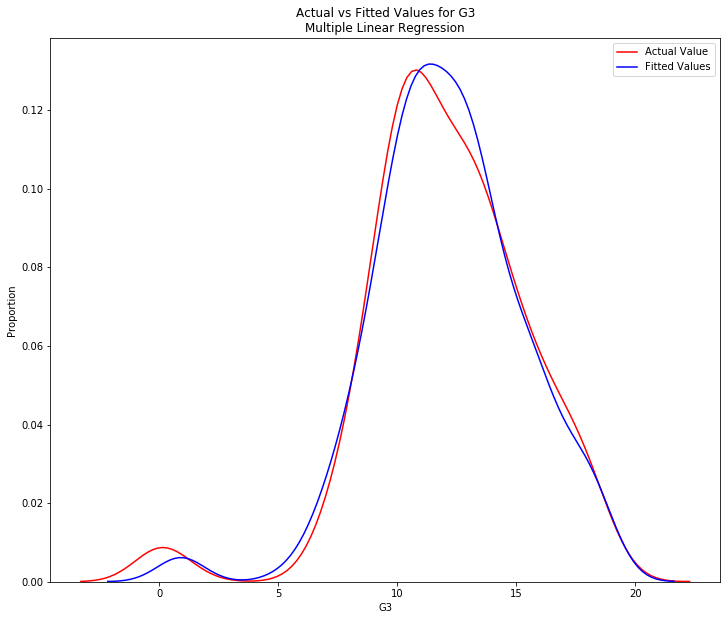

In [58]:
plt.figure(figsize=(12, 10))


ax1 = sns.distplot(t_test, hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for G3\nMultiple Linear Regression')
plt.xlabel('G3')
plt.ylabel('Proportion')

plt.show()
plt.close()

In [35]:
lm.score(x_test,t_test)

0.8603031333071328

# Comparing various Regresion Methods

##Rigde Regression

The idea behind using Ridge Regression is to ensure that the model does not overfit or underfit.

In [0]:
 from sklearn.linear_model import Ridge

In [37]:
ridge_model=Ridge(alpha=0.05)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.05, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [0]:
ridge_Yhat=ridge_model.predict(x_test)

In [39]:
#r-squared test result
ridge_model.score(x_test,t_test)

0.8603109593385191

## LASSO Regrsssion

In [0]:
df=student_df._get_numeric_data()

In [41]:
df.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,schoolsup_no,schoolsup_yes,famsup_no,famsup_yes,paid_no,paid_yes,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,0.428571,4,4,2,2,0,4,3,4,1,1,3,4,0,11,11,1,0,1,0,0,1,1,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0,1,0
1,0.285714,1,1,1,2,0,5,3,3,1,1,3,2,9,11,11,1,0,1,0,0,1,1,0,0,1,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0
2,0.000000,1,1,1,2,0,4,3,2,2,3,3,6,12,13,12,1,0,1,0,0,1,0,1,0,1,0,1,1,0,1,0,1,0,0,1,0,1,0,1,1,0
3,0.000000,4,2,1,3,0,3,2,2,1,1,5,0,14,14,14,1,0,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,0,1,0,1,0,1,0,1
4,0.142857,3,3,1,2,0,4,3,2,1,2,5,0,11,13,13,1,0,1,0,0,1,1,0,0,1,1,0,0,1,1,0,1,0,0,1,0,1,1,0,1,0


In [0]:
from sklearn.linear_model import Lasso
LASSO=Lasso(alpha=0.05)

In [43]:
LASSO.fit(x_train,y_train)
LASSO.score(x_test,t_test)

0.8649018223358254

In [44]:
LASSO.coef_

array([ 0.        ,  0.        ,  0.        ,  0.88525804,  0.14361045,
       -0.04164248, -0.        ,  0.06048144,  0.04462443, -0.07963935,
       -0.        ])

In [0]:
from sklearn.linear_model import ElasticNet
elastic=ElasticNet(random_state=0)

In [46]:
elastic.fit(x_train,y_train)
elastic.score(x_test,t_test)

0.8565028816431735

In [47]:
elastic.coef_

array([ 0.        ,  0.        , -0.        ,  0.73903222,  0.21877086,
       -0.        , -0.        ,  0.        ,  0.        , -0.        ,
       -0.        ])

In [0]:
from sklearn.tree import DecisionTreeRegressor

In [0]:
sdf=student_df.copy()

In [0]:
sdf.drop(columns = ["G3"],inplace=True)

In [0]:
xtr,ytr,xts,yts=train_test_split(sdf,student_df[['G3']],test_size=0.3,random_state=1)

In [52]:
DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [53]:
DTR.score(x_test,t_test)

0.6865604789372488

In [0]:
from sklearn.ensemble import RandomForestRegressor
RFR=RandomForestRegressor()

In [55]:
RFR.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [56]:
RFR.score(x_test,t_test)

0.8300995083151486